<a href="https://colab.research.google.com/github/DominiquePeytrignet/Portfolio/blob/main/Wind_turbines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data wrangling
import pandas as pd
import numpy as np
import time
from tqdm import tqdm

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve
from sklearn.tree import plot_tree

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

# machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import scipy
from scipy.cluster import hierarchy as hc
from scipy import optimize

from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype


# Goal Definition
  Our Goal: Our goal is to predict the Power Production of a windturbine

  Questions: Which are the most important features?

# Data Exploration

**Loading the Data**

In [ ]:
#importing our dataset from .csv file
df = pd.read_csv("windturbines.csv") 
df.head(10)
# "df" will be the codeName of our dataFrame

,Turbine_ID,Timestamp,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
0,T01,2016-01-08 23:10:00+00:00,1657.5,1299.2,1495.0,83.8,47,62,62,61,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,49,220.6
1,T01,2016-01-09 00:10:00+00:00,1673.2,1244.4,1530.5,103.1,58,69,68,67,...,-999.9,-904.2,-1000.0,2.3,998.8,1000.0,796.5,12.8,53,228.0
2,T01,2016-04-19 14:10:00+00:00,1688.8,1356.4,1550.5,83.5,53,84,83,82,...,-998.3,-679.1,-1000.0,19.4,989.7,1000.0,456.4,58.8,59,137.9
3,T01,2016-04-19 15:20:00+00:00,1454.5,1227.7,1269.1,37.1,54,56,57,57,...,-591.5,-28.6,-1000.0,298.3,591.5,1000.0,28.6,298.3,43,138.9
4,T01,2016-04-19 16:20:00+00:00,1373.8,949.2,1248.8,49.8,52,53,54,54,...,-365.0,0.0,-1000.0,327.9,365.0,1000.0,0.0,327.9,37,182.0
5,T01,2016-01-09 02:00:00+00:00,1701.2,1443.1,1619.4,56.6,64,85,82,81,...,-993.9,-635.9,-1000.0,37.9,964.2,1000.0,433.7,100.2,58,231.5
6,T01,2016-01-09 03:30:00+00:00,1759.4,1270.3,1624.9,66.8,66,95,91,90,...,-924.9,-583.3,-1000.0,154.0,862.5,1000.0,406.1,230.8,60,249.0
7,T01,2016-01-09 04:00:00+00:00,1718.4,1462.4,1631.1,43.9,67,98,94,92,...,-967.9,-583.3,-1000.0,101.6,868.6,1000.0,406.1,174.6,61,249.0
8,T01,2016-01-09 04:40:00+00:00,1774.5,1325.9,1611.2,82.7,65,91,89,87,...,-919.3,-583.3,-1000.0,147.9,803.4,1000.0,406.1,231.3,60,242.0
9,T01,2016-04-19 20:10:00+00:00,1258.4,1239.0,1248.9,3.4,49,50,51,50,...,-258.0,-8.5,-436.3,95.2,258.0,436.3,8.5,95.2,34,180.3


**Removing max and minimum values of the dataset and just use average and standard-diviation values.**

When it comes to data cleaning we made the hypothesis that the extrem values are not important as far as we have the standard-deviation. However, the standard-deviation it's very important in our project due to the stauration of the power production when the wind speed exceed the value which the turbin is producing its maximum energy. When the wind speed exceed this value the windmill must use brakes and other mechanisims in order to avoid damages in the structure and engine, so it consumes part of the enrgy.



To see all the columns we use the transpose method

In [ ]:
max_cols = [col for col in df.columns if 'Max' in col]
min_cols = [col for col in df.columns if "Min" in col]
#print(list(df.columns))
print(max_cols)
print(min_cols)

['Gen_RPM_Max', 'Rtr_RPM_Max', 'Amb_WindSpeed_Max', 'Blds_PitchAngle_Max', 'Grd_Prod_Pwr_Max', 'Grd_Prod_ReactPwr_Max', 'Grd_Prod_PsblePwr_Max', 'Grd_Prod_PsbleInd_Max', 'Grd_Prod_PsbleCap_Max']
['Gen_RPM_Min', 'Rtr_RPM_Min', 'Amb_WindSpeed_Min', 'Blds_PitchAngle_Min', 'Grd_Prod_Pwr_Min', 'Grd_Prod_ReactPwr_Min', 'Grd_Prod_PsblePwr_Min', 'Grd_Prod_PsbleInd_Min', 'Grd_Prod_PsbleCap_Min']


In [ ]:
for col in max_cols:
  if col in df.columns:
    df.drop(col , axis=1, inplace=True)
  else:
    pass

for col in min_cols:
  if col in df.columns:
    df.drop(col , axis=1, inplace=True)
  else:
    pass


**Removing all the temperatures, expect oil temperatures**

As far as we know, the oil it's the main thermodinamic component in the windturbin, so it will absorb the heat produced in the engine and the other components. We can use this information to summarize the temperatures of the componets in the windmill. Temperature it's critical data due to it's relevance in the performance of the whole windmill.

In [ ]:
temp_cols = [col for col in df.columns if 'Temp' in col]
#remove oil temperatures of this list because we want to keep them:
temp_cols.remove("Hyd_Oil_Temp_Avg")
temp_cols.remove("Gear_Oil_Temp_Avg")

print(temp_cols)

['Gen_Bear_Temp_Avg', 'Gen_Phase1_Temp_Avg', 'Gen_Phase2_Temp_Avg', 'Gen_Phase3_Temp_Avg', 'Gear_Bear_Temp_Avg', 'Nac_Temp_Avg', 'Amb_Temp_Avg', 'HVTrafo_Phase1_Temp_Avg', 'HVTrafo_Phase2_Temp_Avg', 'HVTrafo_Phase3_Temp_Avg', 'Grd_InverterPhase1_Temp_Avg', 'Cont_Top_Temp_Avg', 'Cont_Hub_Temp_Avg', 'Cont_VCP_Temp_Avg', 'Gen_SlipRing_Temp_Avg', 'Spin_Temp_Avg', 'Cont_VCP_ChokcoilTemp_Avg', 'Grd_RtrInvPhase1_Temp_Avg', 'Grd_RtrInvPhase2_Temp_Avg', 'Grd_RtrInvPhase3_Temp_Avg', 'Cont_VCP_WtrTemp_Avg', 'Grd_Busbar_Temp_Avg', 'Gen_Bear2_Temp_Avg']


In [ ]:
#delete the columns with temperature from the dataset (df)
for col in temp_cols:
  if col in df.columns:
    df.drop(col , axis=1, inplace=True)
  else:
    pass

As we are studying the Gen1, the data from the other generators are not important for now. Therefore we can delate these columns     

In [ ]:
df.drop("Prod_LatestAvg_ReactPwrGen2", axis=1, inplace=True)
df.drop("Prod_LatestAvg_ActPwrGen2", axis=1, inplace=True)
#df.drop("Prod_LatestAvg_ActPwrGen2", axis=1, inplace=True)
df.drop("Prod_LatestAvg_ReactPwrGen0", axis=1, inplace=True)
df.drop("Prod_LatestAvg_ReactPwrGen1", axis=1, inplace=True)
df.drop("Prod_LatestAvg_ActPwrGen0", axis=1, inplace=True)


**The Shape of the data**

In [ ]:
df.shape

(52439, 37)

We want to see if each measurement is measured at an unique time

In [ ]:
df['Timestamp'].nunique()


52433

In [ ]:
df[df["Timestamp"].duplicated()]


,Turbine_ID,Timestamp,Gen_RPM_Avg,Gen_RPM_Std,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,...,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Std,Nac_Direction_Avg
22241,T01,2016-10-30 02:10:00+00:00,1618.6,47.6,47,51,14.3,8.9,1.9,13.5,...,301.9,-209.4,2.7,1177.4,301.8,-995.9,29.5,955.7,105.4,115.5
24137,T01,2016-10-30 02:00:00+00:00,1680.8,15.1,49,50,14.9,13.7,2.2,-5.8,...,10.7,-220.4,3.4,1998.9,11.0,-585.3,21.0,407.2,11.0,109.1
36144,T01,2016-10-30 02:30:00+00:00,1676.9,16.4,50,51,14.9,11.8,2.3,-7.5,...,227.1,-222.9,2.5,1841.6,224.9,-733.6,192.0,561.7,218.9,108.8
36146,T01,2016-10-30 02:50:00+00:00,1635.1,26.6,45,51,14.5,9.0,1.8,-10.0,...,249.7,-210.0,3.3,1245.4,249.2,-988.3,56.4,954.2,120.4,115.5
38669,T01,2016-10-30 02:20:00+00:00,1681.4,18.4,50,50,14.9,13.2,2.2,3.9,...,23.9,-223.2,2.4,1995.5,24.9,-591.7,44.2,410.7,24.9,108.8
50519,T01,2016-10-30 02:40:00+00:00,1652.7,25.3,50,55,14.6,10.0,2.1,-3.4,...,275.0,-215.6,5.7,1497.6,270.1,-960.8,107.3,836.8,191.4,115.1


We want to remove those duplicates

In [ ]:
indexes= df[df["Timestamp"].duplicated()].index
indexes_list = list(indexes)
df.drop(indexes_list, inplace=True)





In [ ]:
df.shape

(52433, 37)

In [ ]:
df.head()

,Turbine_ID,Timestamp,Gen_RPM_Avg,Gen_RPM_Std,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,...,Grd_Prod_Pwr_Std,Grd_Prod_ReactPwr_Avg,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Std,Nac_Direction_Avg
0,T01,2016-01-08 23:10:00+00:00,1495.0,83.8,29,49,13.2,7.1,1.2,-19.3,...,144.4,-144.4,6.1,588.1,145.0,-1000.0,0.0,1000.0,0.0,220.6
1,T01,2016-01-09 00:10:00+00:00,1530.5,103.1,28,53,13.6,7.5,1.5,-15.4,...,224.4,-168.9,12.4,730.3,228.5,-999.9,2.3,998.8,12.8,228.0
2,T01,2016-04-19 14:10:00+00:00,1550.5,83.5,42,54,13.7,7.7,1.5,0.6,...,273.4,-162.6,4.9,854.4,274.0,-998.3,19.4,989.7,58.8,137.9
3,T01,2016-04-19 15:20:00+00:00,1269.1,37.1,38,50,11.2,4.7,1.1,10.3,...,93.7,-88.0,8.4,138.7,93.4,-591.5,298.3,591.5,298.3,138.9
4,T01,2016-04-19 16:20:00+00:00,1248.8,49.8,35,46,11.1,4.0,1.1,-14.5,...,75.1,-46.0,114.2,79.0,68.6,-365.0,327.9,365.0,327.9,182.0


To see all the column we can use the transpose method

In [ ]:
df.head().T

,0,1,2,3,4
Turbine_ID,T01,T01,T01,T01,T01
Timestamp,2016-01-08 23:10:00+00:00,2016-01-09 00:10:00+00:00,2016-04-19 14:10:00+00:00,2016-04-19 15:20:00+00:00,2016-04-19 16:20:00+00:00
Gen_RPM_Avg,1495.0,1530.5,1550.5,1269.1,1248.8
Gen_RPM_Std,83.8,103.1,83.5,37.1,49.8
Hyd_Oil_Temp_Avg,29,28,42,38,35
Gear_Oil_Temp_Avg,49,53,54,50,46
Rtr_RPM_Avg,13.2,13.6,13.7,11.2,11.1
Amb_WindSpeed_Avg,7.1,7.5,7.7,4.7,4.0
Amb_WindSpeed_Std,1.2,1.5,1.5,1.1,1.1
Amb_WindDir_Relative_Avg,-19.3,-15.4,0.6,10.3,-14.5


**Visualising the data**

How is the Power Generation correlated to the windspeed?

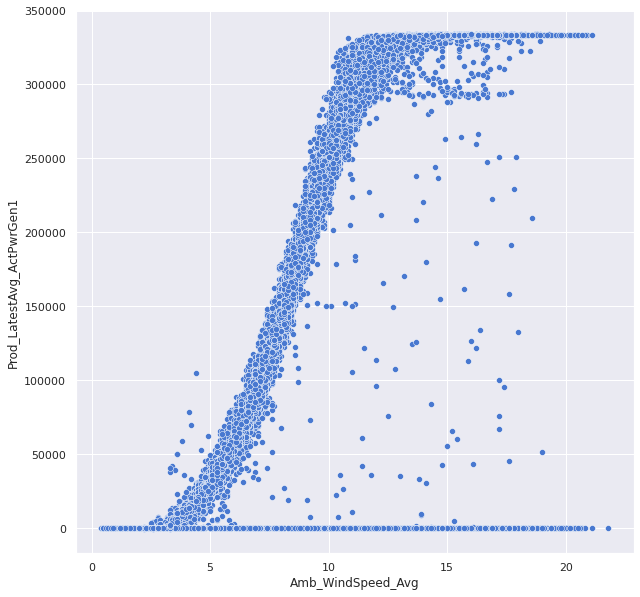

In [ ]:
#Scatter Plots
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="Amb_WindSpeed_Avg", y="Prod_LatestAvg_ActPwrGen1")


We see a typical S-curve. However as the S is thin, it could be possible to implement linear models with Air speed as the unique input and Power generated as the only output.

Here we see the theorical curve provided by the manufacturer, we can see that the shape of the curve is the same apart from some deviations that may appear for the real conditions

In [ ]:
WTcat = pd.read_excel("Cathalog_data.xlsx") #'/content/drive/MyDrive/Cathalog_data.xlsx'
WTcat.head()

,Amb_WindSpeed_Avg,Grd_Prod_Pwr_Avg
0,4.0,89
1,4.5,142
2,5.0,204
3,5.5,279
4,6.0,368


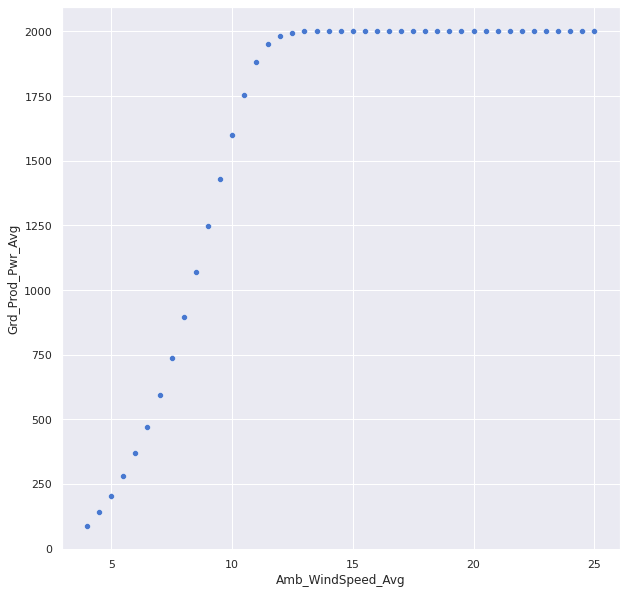

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
# WTcatax=WTcat.plot.scatter(x='Amb_WindSpeed_Avg',y='Grd_Prod_Pwr_Avg',c='Purple')
sns.scatterplot(data=WTcat, x="Amb_WindSpeed_Avg", y="Grd_Prod_Pwr_Avg")   


On the next plot we can se how the generator speed is 
related with the energy production

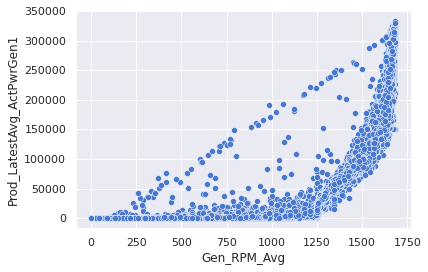

In [ ]:
fig_dims = (6, 4)
fig, ax = plt.subplots(figsize=fig_dims)               
sns.scatterplot(data=df, x="Gen_RPM_Avg", y="Prod_LatestAvg_ActPwrGen1")   

# Data Cleaning

**Remove Outliers**

We only want the positive generated power in our data thats why we remove all the negatives ones.
And because the graph shows a very unrealistic straight line a the top of the graph we remove the values over 333000 aswell.

In [ ]:
df["Prod_LatestAvg_ActPwrGen1"].sort_values() 

31096      -369
20929      -344
8376       -317
51343      -301
34984      -278
          ...  
9366     333844
4410     333848
48415    333848
12581    333849
13171    333853
Name: Prod_LatestAvg_ActPwrGen1, Length: 52433, dtype: int64

In [ ]:
df = df[df["Prod_LatestAvg_ActPwrGen1"]>0]


In [ ]:
df = df[df["Prod_LatestAvg_ActPwrGen1"]<333000]

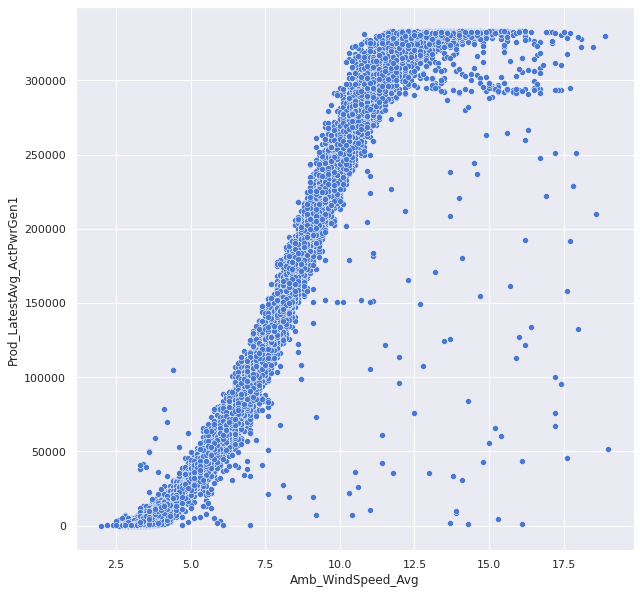

In [ ]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df, x="Amb_WindSpeed_Avg", y="Prod_LatestAvg_ActPwrGen1")

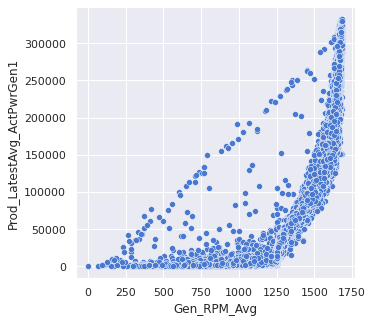

In [ ]:
fig_dims = (5, 5)
fig, ax = plt.subplots(figsize=fig_dims)               
sns.scatterplot(data=df, x="Gen_RPM_Avg", y="Prod_LatestAvg_ActPwrGen1")

**Feature Engineering**

First we want to split up the Timestamp column, so that we can distinguish between daytime or nighttime for example. In the dummies part we can then get each time as a column to see if any specific time has influence on the model. For example 15:00 

In [ ]:
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df['Time'] = pd.to_datetime(df['Timestamp']).dt.time
# https://stackoverflow.com/questions/35595710/splitting-timestamp-column-into-separate-date-and-time-columns


In [ ]:
df["Date"].head()

0    2016-01-08
1    2016-01-09
2    2016-04-19
3    2016-04-19
4    2016-04-19
Name: Date, dtype: object

In [ ]:
df["Time"].head()

0    23:10:00
1    00:10:00
2    14:10:00
3    15:20:00
4    16:20:00
Name: Time, dtype: object

After that we won't need the "Timestamp" column anymore

In [ ]:
df.drop(["Timestamp"], axis=1, inplace=True)

Because the data is from one single turbine, we don't need the columne "Turbine_ID" anymore.

In [ ]:
df.drop(["Turbine_ID"], axis=1, inplace=True)

In [ ]:
df.head(2)

,Gen_RPM_Avg,Gen_RPM_Std,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Prod_LatestAvg_ActPwrGen1,...,Grd_Prod_ReactPwr_Std,Grd_Prod_PsblePwr_Avg,Grd_Prod_PsblePwr_Std,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Std,Nac_Direction_Avg,Date,Time
0,1495.0,83.8,29,49,13.2,7.1,1.2,-19.3,201.2,98177,...,6.1,588.1,145.0,-1000.0,0.0,1000.0,0.0,220.6,2016-01-08,23:10:00
1,1530.5,103.1,28,53,13.6,7.5,1.5,-15.4,212.6,120935,...,12.4,730.3,228.5,-999.9,2.3,998.8,12.8,228.0,2016-01-09,00:10:00


Correlation Matrix

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix['Prod_LatestAvg_ActPwrGen1'].sort_values(ascending=False)

Prod_LatestAvg_ActPwrGen1     1.000000
Prod_LatestAvg_TotActPwr      0.999993
Grd_Prod_Pwr_Avg              0.999992
Grd_Prod_CurPhse2_Avg         0.999220
Grd_Prod_CurPhse3_Avg         0.998964
Grd_Prod_CurPhse1_Avg         0.998952
Grd_Prod_PsblePwr_Avg         0.994896
Amb_WindSpeed_Est_Avg         0.972649
Amb_WindSpeed_Avg             0.970388
Amb_WindSpeed_Std             0.811095
Gen_RPM_Avg                   0.795876
Rtr_RPM_Avg                   0.793368
Grd_Prod_VoltPhse3_Avg        0.761333
Gear_Oil_Temp_Avg             0.668167
Grd_Prod_CosPhi_Avg           0.642792
Hyd_Oil_Temp_Avg              0.582938
Grd_Prod_PsblePwr_Std         0.565015
Grd_Prod_Pwr_Std              0.553802
Grd_Prod_PsbleCap_Avg         0.167839
Amb_WindDir_Relative_Avg     -0.002188
Grd_Prod_Freq_Avg            -0.011541
Grd_Prod_VoltPhse1_Avg       -0.055498
Blds_PitchAngle_Avg          -0.057349
Grd_Prod_PsbleCap_Std        -0.097166
Grd_Prod_VoltPhse2_Avg       -0.126614
Blds_PitchAngle_Std      

We are removing the values over 0.99 correlation because they would be basically the same value like the produced power (1.00)
Maybe Simon can give a better technical reasoning for this :D

In [ ]:
df.drop(["Prod_LatestAvg_TotActPwr", "Grd_Prod_Pwr_Avg", "Grd_Prod_CurPhse1_Avg", "Grd_Prod_CurPhse3_Avg", "Grd_Prod_CurPhse2_Avg", "Grd_Prod_PsblePwr_Avg" ], axis=1, inplace=True)

In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix['Prod_LatestAvg_ActPwrGen1'].sort_values(ascending=False)

Prod_LatestAvg_ActPwrGen1     1.000000
Amb_WindSpeed_Est_Avg         0.972649
Amb_WindSpeed_Avg             0.970388
Amb_WindSpeed_Std             0.811095
Gen_RPM_Avg                   0.795876
Rtr_RPM_Avg                   0.793368
Grd_Prod_VoltPhse3_Avg        0.761333
Gear_Oil_Temp_Avg             0.668167
Grd_Prod_CosPhi_Avg           0.642792
Hyd_Oil_Temp_Avg              0.582938
Grd_Prod_PsblePwr_Std         0.565015
Grd_Prod_Pwr_Std              0.553802
Grd_Prod_PsbleCap_Avg         0.167839
Amb_WindDir_Relative_Avg     -0.002188
Grd_Prod_Freq_Avg            -0.011541
Grd_Prod_VoltPhse1_Avg       -0.055498
Blds_PitchAngle_Avg          -0.057349
Grd_Prod_PsbleCap_Std        -0.097166
Grd_Prod_VoltPhse2_Avg       -0.126614
Blds_PitchAngle_Std          -0.142920
Grd_Prod_PsbleInd_Std        -0.193822
Amb_WindDir_Abs_Avg          -0.263769
Nac_Direction_Avg            -0.271420
Gen_RPM_Std                  -0.338010
Rtr_RPM_Std                  -0.338781
Grd_Prod_PsbleInd_Avg    

The windspeed has the highest correlation to our predictiong goal

**Change "obecjt type" data to "categorical"**

In [ ]:
df.dtypes

Gen_RPM_Avg                   float64
Gen_RPM_Std                   float64
Hyd_Oil_Temp_Avg                int64
Gear_Oil_Temp_Avg               int64
Rtr_RPM_Avg                   float64
Amb_WindSpeed_Avg             float64
Amb_WindSpeed_Std             float64
Amb_WindDir_Relative_Avg      float64
Amb_WindDir_Abs_Avg           float64
Prod_LatestAvg_ActPwrGen1       int64
Prod_LatestAvg_TotReactPwr      int64
Blds_PitchAngle_Avg           float64
Blds_PitchAngle_Std           float64
Grd_Prod_CosPhi_Avg           float64
Grd_Prod_Freq_Avg             float64
Grd_Prod_VoltPhse1_Avg        float64
Grd_Prod_VoltPhse2_Avg        float64
Grd_Prod_VoltPhse3_Avg        float64
Rtr_RPM_Std                   float64
Amb_WindSpeed_Est_Avg         float64
Grd_Prod_Pwr_Std              float64
Grd_Prod_ReactPwr_Avg         float64
Grd_Prod_ReactPwr_Std         float64
Grd_Prod_PsblePwr_Std         float64
Grd_Prod_PsbleInd_Avg         float64
Grd_Prod_PsbleInd_Std         float64
Grd_Prod_Psb

In [ ]:
df['Date'] = df['Date'].astype('category')
df['Time'] = df['Time'].astype('category')



In [ ]:
df.count(0)

Gen_RPM_Avg                   34891
Gen_RPM_Std                   34891
Hyd_Oil_Temp_Avg              34891
Gear_Oil_Temp_Avg             34891
Rtr_RPM_Avg                   34891
Amb_WindSpeed_Avg             34891
Amb_WindSpeed_Std             34891
Amb_WindDir_Relative_Avg      34891
Amb_WindDir_Abs_Avg           34891
Prod_LatestAvg_ActPwrGen1     34891
Prod_LatestAvg_TotReactPwr    34891
Blds_PitchAngle_Avg           34891
Blds_PitchAngle_Std           34891
Grd_Prod_CosPhi_Avg           34891
Grd_Prod_Freq_Avg             34891
Grd_Prod_VoltPhse1_Avg        34891
Grd_Prod_VoltPhse2_Avg        34891
Grd_Prod_VoltPhse3_Avg        34891
Rtr_RPM_Std                   34891
Amb_WindSpeed_Est_Avg         34891
Grd_Prod_Pwr_Std              34891
Grd_Prod_ReactPwr_Avg         34891
Grd_Prod_ReactPwr_Std         34891
Grd_Prod_PsblePwr_Std         34891
Grd_Prod_PsbleInd_Avg         34891
Grd_Prod_PsbleInd_Std         34891
Grd_Prod_PsbleCap_Avg         34891
Grd_Prod_PsbleCap_Std       

**Missing Values**

In [ ]:
df.isna().sum()


Gen_RPM_Avg                   0
Gen_RPM_Std                   0
Hyd_Oil_Temp_Avg              0
Gear_Oil_Temp_Avg             0
Rtr_RPM_Avg                   0
Amb_WindSpeed_Avg             0
Amb_WindSpeed_Std             0
Amb_WindDir_Relative_Avg      0
Amb_WindDir_Abs_Avg           0
Prod_LatestAvg_ActPwrGen1     0
Prod_LatestAvg_TotReactPwr    0
Blds_PitchAngle_Avg           0
Blds_PitchAngle_Std           0
Grd_Prod_CosPhi_Avg           0
Grd_Prod_Freq_Avg             0
Grd_Prod_VoltPhse1_Avg        0
Grd_Prod_VoltPhse2_Avg        0
Grd_Prod_VoltPhse3_Avg        0
Rtr_RPM_Std                   0
Amb_WindSpeed_Est_Avg         0
Grd_Prod_Pwr_Std              0
Grd_Prod_ReactPwr_Avg         0
Grd_Prod_ReactPwr_Std         0
Grd_Prod_PsblePwr_Std         0
Grd_Prod_PsbleInd_Avg         0
Grd_Prod_PsbleInd_Std         0
Grd_Prod_PsbleCap_Avg         0
Grd_Prod_PsbleCap_Std         0
Nac_Direction_Avg             0
Date                          0
Time                          0
dtype: i

There are no missing values in our dataset

**Make categorical Data numerical**

We use the dummie method to convert the categorical data into columns

In [ ]:
turbine_data = pd.get_dummies(df)


In [ ]:
turbine_data.head()

,Gen_RPM_Avg,Gen_RPM_Std,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Prod_LatestAvg_ActPwrGen1,...,Time_22:20:00,Time_22:30:00,Time_22:40:00,Time_22:50:00,Time_23:00:00,Time_23:10:00,Time_23:20:00,Time_23:30:00,Time_23:40:00,Time_23:50:00
0,1495.0,83.8,29,49,13.2,7.1,1.2,-19.3,201.2,98177,...,0,0,0,0,0,1,0,0,0,0
1,1530.5,103.1,28,53,13.6,7.5,1.5,-15.4,212.6,120935,...,0,0,0,0,0,0,0,0,0,0
2,1550.5,83.5,42,54,13.7,7.7,1.5,0.6,138.5,142022,...,0,0,0,0,0,0,0,0,0,0
3,1269.1,37.1,38,50,11.2,4.7,1.1,10.3,149.2,23179,...,0,0,0,0,0,0,0,0,0,0
4,1248.8,49.8,35,46,11.1,4.0,1.1,-14.5,167.5,12343,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
turbine_data.shape

(34891, 539)

In [ ]:
turbine_data.dtypes

Gen_RPM_Avg          float64
Gen_RPM_Std          float64
Hyd_Oil_Temp_Avg       int64
Gear_Oil_Temp_Avg      int64
Rtr_RPM_Avg          float64
                      ...   
Time_23:10:00          uint8
Time_23:20:00          uint8
Time_23:30:00          uint8
Time_23:40:00          uint8
Time_23:50:00          uint8
Length: 539, dtype: object

# 1. Model: Random forrest
Most of the code here is from the Data Science Lecture with my own intepretetations
# Modeler:  Dominique Peytrignet

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

As we have learned I will use the Root Mean Squared Error as performance measurement for my model.





In [ ]:
def rmse(y, yhat):
    """
    Args:
        y (array): Actual values for target.
        yhat (array): Predicted values for target.
    """
    return np.sqrt(mean_squared_error(y, yhat))

def print_rf_scores(fitted_model):
    """Generates RMSE and R^2 scores from fitted Random Forest model."""

    yhat_train = fitted_model.predict(X_train)
    yhat_valid = fitted_model.predict(X_valid)

    scores = {
        "RMSE on train:": rmse(y_train, yhat_train),
        "RMSE on valid:": rmse(y_valid, yhat_valid),
    }
    if hasattr(fitted_model, "oob_score_"):
        scores["OOB R^2:"] = fitted_model.oob_score_

    for score_name, score_value in scores.items():
        print(score_name, round(score_value, 3))

The RMSE punishes larger error in the prediction. The root is taken because the result of the RMSE will be the same unit as the predicted value, in our example it is Watt hours [Wh]. The lower the value the better the model has performed, i.e the less errors were made.

## Model

I am choosing the random forrest regressor from sklearn

In [ ]:
from sklearn.ensemble import RandomForestRegressor

THis is going to be my base model with 7 trees

In [ ]:
model1 = RandomForestRegressor(n_estimators=7, random_state=1999, n_jobs=-1, max_depth=3)

Creating feature matrix X and target vector y

In [ ]:
X = turbine_data.loc[:, turbine_data.columns != 'Prod_LatestAvg_ActPwrGen1']
X.head()

,Gen_RPM_Avg,Gen_RPM_Std,Hyd_Oil_Temp_Avg,Gear_Oil_Temp_Avg,Rtr_RPM_Avg,Amb_WindSpeed_Avg,Amb_WindSpeed_Std,Amb_WindDir_Relative_Avg,Amb_WindDir_Abs_Avg,Prod_LatestAvg_TotReactPwr,...,Time_22:20:00,Time_22:30:00,Time_22:40:00,Time_22:50:00,Time_23:00:00,Time_23:10:00,Time_23:20:00,Time_23:30:00,Time_23:40:00,Time_23:50:00
0,1495.0,83.8,29,49,13.2,7.1,1.2,-19.3,201.2,-24113,...,0,0,0,0,0,1,0,0,0,0
1,1530.5,103.1,28,53,13.6,7.5,1.5,-15.4,212.6,-28146,...,0,0,0,0,0,0,0,0,0,0
2,1550.5,83.5,42,54,13.7,7.7,1.5,0.6,138.5,-27091,...,0,0,0,0,0,0,0,0,0,0
3,1269.1,37.1,38,50,11.2,4.7,1.1,10.3,149.2,-14681,...,0,0,0,0,0,0,0,0,0,0
4,1248.8,49.8,35,46,11.1,4.0,1.1,-14.5,167.5,-7705,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = turbine_data["Prod_LatestAvg_ActPwrGen1"]
y.head()

0     98177
1    120935
2    142022
3     23179
4     12343
Name: Prod_LatestAvg_ActPwrGen1, dtype: int64

Splitting the data in to train and validation sets

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1999)

print(f'{len(X_train)} train rows + {len(X_valid)} valid rows')

27912 train rows + 6979 valid rows


Splitting the data in to train and validation sets gives us the possibility to validate the model, so that we are not overfitting the model. With this code we are spliting the dataset in to  80% training data and 20% validation data.

fit the model on training data

In [ ]:
model1.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=7, n_jobs=-1, random_state=1999)

## Evaluate prediction

In [ ]:
prediction = model1.predict(X_valid)
y_pred=pd.DataFrame(prediction, columns=['Prod_LatestAvg_ActPwrGen1'])

rmse(y_valid, y_pred)
print_rf_scores(model1)


RMSE on train: 13358.154
RMSE on valid: 12947.133


In [ ]:
y_valid = y_valid.reset_index()
y_valid.drop(['index'], axis=1, inplace=True)

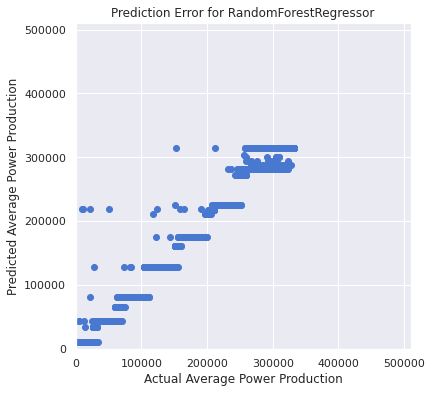

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_valid,y_pred)
plt.xlabel("Actual Average Power Production")
plt.ylabel("Predicted Average Power Production")
plt.xlim([0,510000])
plt.ylim([0,510000])
plt.title(f"Prediction Error for {model1.__class__.__name__}")
plt.show()

we see some kind of a linear relationship between the predicted and the actual values. This means the model performs fearly well. Still there are some outliers.

## Hyperparamter Tuning

I first try to improve the model by increasing the number of trees and see if the performance has gone higher. 

Further I use bootstrap = True so it doesn't use the whole dataset to create samples for the different trees. With this setting the sample size will be default to 2. 
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html


In [ ]:
model2 = RandomForestRegressor(n_estimators=10, max_depth=3, bootstrap=True, random_state=1999, n_jobs=-1)
model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, n_jobs=-1,
                      random_state=1999)

Finding out the optimal amount of trees

In [ ]:
preds = np.stack([tree.predict(X_valid) for tree in model2.estimators_])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

In [ ]:
preds.shape

(10, 6979)

In [ ]:
from numpy.testing import assert_array_equal

preds_list = []

for tree in model2.estimators_:
    preds_list.append(tree.predict(X_valid))

# concatenate list of predictions into single array 
preds_v2 = np.stack(preds_list)

# test that arrays are equal
assert_array_equal(preds, preds_v2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

In [ ]:
def plot_r2_vs_trees(preds, y_valid):
    """Generate a plot of R^2 score on validation set vs number of trees in Random Forest"""
    fig, ax = plt.subplots(figsize=(10,10))
    plt.plot(
        [
            r2_score(y_valid, np.mean(preds[: i + 1], axis=0))
            for i in range(len(preds) + 1)
        ]
    )
    ax.set_ylabel("$R^2$ on validation set")
    ax.set_xlabel("Number of trees")

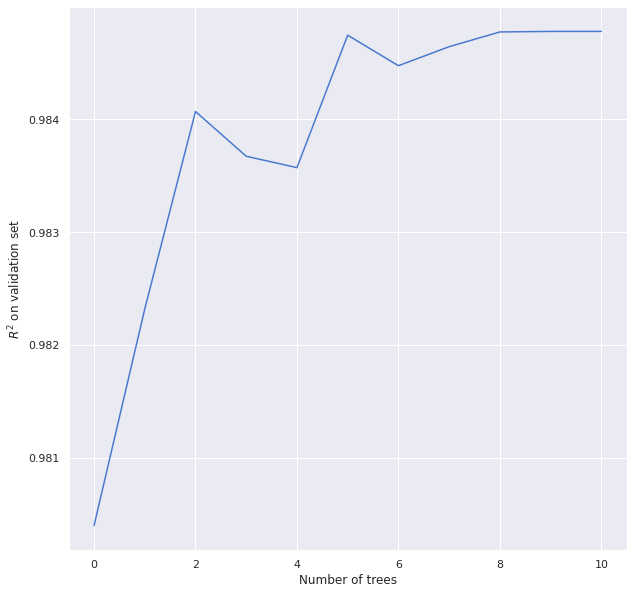

In [ ]:

plot_r2_vs_trees(preds, y_valid)

Wee see that with more trees the performance generaly goes up, there is a little dump between 2-4 trees. The best amount of trees would be 5 or 8. I am curious how the model performs with even larger number of trees?

In [ ]:
model3 = RandomForestRegressor(n_estimators=40, max_depth=3,bootstrap=True, random_state=1999, n_jobs=-1)
model3.fit(X_train, y_train)
print_rf_scores(model3)

RMSE on train: 13234.86
RMSE on valid: 12806.275


In [ ]:
preds = np.stack([tree.predict(X_valid) for tree in model3.estimators_])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature n

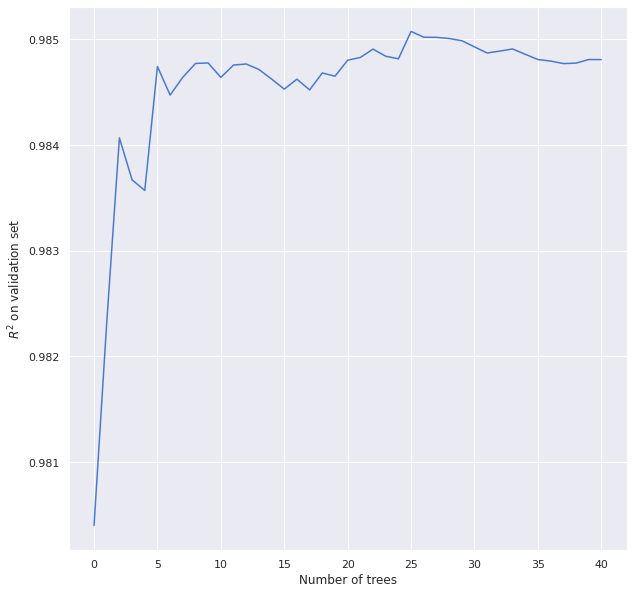

In [ ]:
plot_r2_vs_trees(preds, y_valid)

We see that the with even higher number of trees the performance is flattening out . But we see a peak at 25 trees, so this would be the best amount.

In [ ]:
model4 = RandomForestRegressor(n_estimators=25, max_depth=3,bootstrap=True, random_state=1999, n_jobs=-1)
model4.fit(X_train, y_train)
print_rf_scores(model4)

RMSE on train: 13192.889
RMSE on valid: 12803.307


Like this I was able to slightly improve the model. It was already well fitted

## More Hyperparameter Tuning

I take model4 as baseline model as it has performerd pretty well, it is now the model 5.

In [ ]:
model5 = RandomForestRegressor(n_estimators=25, max_depth = 3, bootstrap=True, random_state=1999, n_jobs=-1, min_samples_leaf=3)
model5.fit(X_train, y_train)
print_rf_scores(model5)

RMSE on train: 13192.889
RMSE on valid: 12803.307


In [ ]:
model6 = RandomForestRegressor(n_estimators=25, max_depth = 3, bootstrap=True, random_state=1999, n_jobs=-1, min_samples_leaf=10)
model6.fit(X_train, y_train)
print_rf_scores(model6)

RMSE on train: 13192.889
RMSE on valid: 12803.307


It seems like that changing the minimum amount of samples per leaf won't change the results of the model.

In [ ]:
model7 = RandomForestRegressor(n_estimators=25, max_depth = 3, bootstrap=True, random_state=1999, n_jobs=-1, min_samples_leaf=10, max_leaf_nodes=50)
model7.fit(X_train, y_train)
print_rf_scores(model7)

RMSE on train: 13192.889
RMSE on valid: 12803.307


also when adding the parameter "max_leaf_nodes" it wont change the result significantly, jsut a little

## Feature Importance

With the feature importance function it is possible to see which columns contribute the most to the performance of the model

In [ ]:
def rf_feature_importance(fitted_model, df):
    return pd.DataFrame(
        {"Column": df.columns, "Importance": fitted_model.feature_importances_}
    ).sort_values("Importance", ascending=False)

In [ ]:
feature_importance = rf_feature_importance(model5, X)

# peek at top 10 features
feature_importance[:10]

,Column,Importance
18,Amb_WindSpeed_Est_Avg,0.992447
0,Gen_RPM_Avg,0.006354
4,Rtr_RPM_Avg,0.000613
23,Grd_Prod_PsbleInd_Avg,0.000294
20,Grd_Prod_ReactPwr_Avg,0.000292
340,Date_2016-11-08,0.000000
362,Date_2016-11-30,0.000000
357,Date_2016-11-25,0.000000
358,Date_2016-11-26,0.000000
359,Date_2016-11-27,0.000000


We see that only the first 4 have some importance for the model. But most significant to the model is obviously the Windspeed because it is the driving force that makes the turbines turn.

**Drop unimportant features**

In [ ]:
feature_importance_threshold = 0.0002
cols_to_keep = feature_importance[
    feature_importance['Importance'] > feature_importance_threshold
]['Column']

len(cols_to_keep)

5

In [ ]:
X_keep = X.copy()[cols_to_keep]
X_train, X_valid = train_test_split(X_keep, test_size=0.2, random_state=1999)

In [ ]:
X_keep.head()

,Amb_WindSpeed_Est_Avg,Gen_RPM_Avg,Rtr_RPM_Avg,Grd_Prod_PsbleInd_Avg,Grd_Prod_ReactPwr_Avg
0,7.0,1495.0,13.2,-1000.0,-144.4
1,7.5,1530.5,13.6,-999.9,-168.9
2,7.9,1550.5,13.7,-998.3,-162.6
3,4.6,1269.1,11.2,-591.5,-88.0
4,4.0,1248.8,11.1,-365.0,-46.0


Now we have a much simpler dataset with not so many feaatures. To make sure that the model still performs well, we will make a sanity check.

In [ ]:
model8 = RandomForestRegressor(n_estimators=25, max_depth = 3, bootstrap=True, random_state=1999, n_jobs=-1, min_samples_leaf=10)

model8.fit(X_train, y_train)
print_rf_scores(model8)

RMSE on train: 13192.949
RMSE on valid: 12801.659


The model stil has a RMSE of 12803 which is the same as the previous model, so we have not negativily impacted the model

## Overfitting

Overfitting is the case when the model is performing well on the training set but poorly on the validation set. THis means that the model has memorized all the structure of the training set and can't react to any form of new data. 

To prevent overfitting we will try to find the best fit for each parameter of the model

Also i don't want that the model is underfitting, which means that the model performes poor on the training set and also bad on the validation set. 

In [ ]:
from sklearn.model_selection import cross_validate
def plot_fitting_graph(x, metric_train, metric_valid, metric_name='metric', xlabel='x', yscale='linear'):
    plt.figure(figsize=(10,10))
    plt.plot(x, metric_train, label='train')
    plt.plot(x, metric_valid, label='valid')
    plt.yscale(yscale)
    plt.title('Fitting graph')
    plt.ylabel(metric_name)
    plt.xlabel(xlabel)
    plt.legend(loc='best')
    plt.grid(True)

In [ ]:
X =X_keep

First we create the untuned model

In [ ]:

rf = RandomForestRegressor(n_jobs=-1)
results = cross_validate(rf, X, y,
                          cv=5,
                          return_train_score=True,
                          scoring='neg_root_mean_squared_error')
print('Train score: %.1f' % -np.mean(results['train_score']))
print('Validation score: %.1f' % -np.mean(results['test_score']))

Train score: 1221.1
Validation score: 3540.6


Now we want to find out what is the best amount of n_estimators for our model, i.e how many trees should the randomforrest have?

**n_estimators**

In [ ]:
rmse_train = []
rmse_valid = []

n_estimators = [25, 50, 100, 200]
for n in tqdm(n_estimators):
    rf = RandomForestRegressor(n_estimators=n, n_jobs=-1)
    results = cross_validate(rf, X, y,
                             cv=5,
                             return_train_score=True,
                             scoring='neg_root_mean_squared_error')
    
    # we average the scores and append them to the list
    rmse_train.append(-np.mean(results['train_score']))
    rmse_valid.append(-np.mean(results['test_score']))

  0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
plot_fitting_graph(n_estimators, rmse_train, rmse_valid, metric_name='RMSE', xlabel='n_estimators')

AS we can see with more estimators the validation error generaly goes down. But as more trees reduce the performance of the model we will stay with 100 estimators.

**max_depth**

The maximum depth of a random forrest is the longest distance from the first node to the last node (leaf) in a tree.

In [ ]:
rmse_train = []
rmse_valid = []

max_depths = [1, 2, 4, 8, 16, 32, 64]
for d in tqdm(max_depths):
    rf = RandomForestRegressor(n_estimators=100, max_depth=d, n_jobs=-1)
    results = cross_validate(rf, X, y,
                             cv=5,
                             return_train_score=True,
                             scoring='neg_root_mean_squared_error')
    
    # we average the scores and append them to the list
    rmse_train.append(-np.mean(results['train_score']))
    rmse_valid.append(-np.mean(results['test_score']))

In [ ]:
plot_fitting_graph(max_depths, rmse_train, rmse_valid, metric_name='RMSE', xlabel='max_depth')

Now we try to find which depth creates the minimum validation error

In [ ]:
max_depths[np.argmin(rmse_valid)]

**min_sample_leaf**

the min_sample_leaf parameter specifies the minimum number of samples that should be present in the laef node after splitting a node

In [ ]:
rmse_train = []
rmse_valid = []

min_samples_leaf = [1, 3, 5, 10, 25]
for s in tqdm(min_samples_leaf):
    rf = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_leaf=s, n_jobs=-1)
    results = cross_validate(rf, X, y,
                             cv=5,
                             return_train_score=True,
                             scoring='neg_root_mean_squared_error')
    
    # we average the scores and append them to the list
    rmse_train.append(-np.mean(results['train_score']))
    rmse_valid.append(-np.mean(results['test_score']))

ValueError: ignored

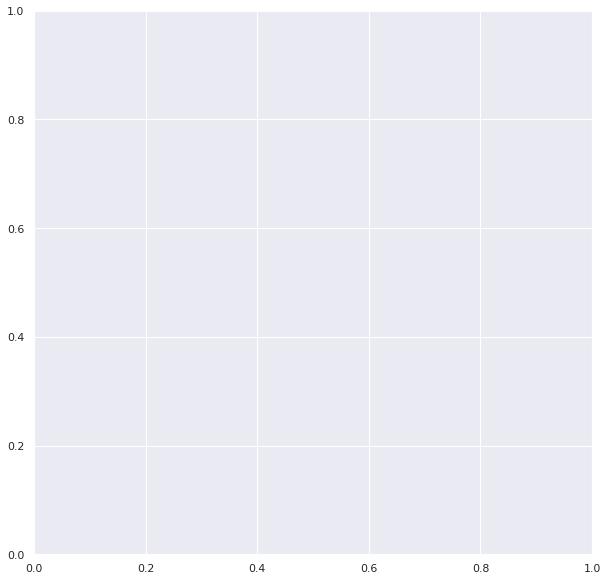

In [ ]:
plot_fitting_graph(min_samples_leaf, rmse_train, rmse_valid, metric_name='RMSE', xlabel='min_samples_leaf')

In [ ]:
min_samples_leaf[np.argmin(rmse_valid)]

1

**max_leaf_nodes**

this parameter tells the model in how many nodes it is allowed to split a single leaf node. If it hits the threshold the tree won't grow further

In [ ]:
rmse_train = []
rmse_valid = []

max_leaf_nodes = [1, 10, 20, 50, 100, 200]
for mln in tqdm(max_leaf_nodes):
    rf = RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_leaf=1, max_leaf_nodes= mln, n_jobs=-1)
    results = cross_validate(rf, X, y,
                             cv=5,
                             return_train_score=True,
                             scoring='neg_root_mean_squared_error')
    
    # we average the scores and append them to the list
    rmse_train.append(-np.mean(results['train_score']))
    rmse_valid.append(-np.mean(results['test_score']))

In [ ]:
plot_fitting_graph(max_leaf_nodes, rmse_train, rmse_valid, metric_name='RMSE', xlabel='max_leaf_nodes')

In [ ]:
max_leaf_nodes[np.argmin(rmse_valid)]

THis result is actually surprising because the plot says that 50 or 100 would be the better answer.

**Final Model**

In [ ]:
model9 = RandomForestRegressor(n_estimators=100, max_depth = 8, min_samples_leaf=1, random_state=1999, n_jobs=-1)

model9.fit(X_train, y_train)
print_rf_scores(model9)

In [ ]:
prediction = model9.predict(X_valid)
y_pred=pd.DataFrame(prediction, columns=['Prod_LatestAvg_ActPwrGen1'])

In [ ]:
y_valid = y_valid.reset_index()
y_valid.drop(['index'], axis=1, inplace=True)

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_valid,y_pred)
plt.xlabel("Actual Average Power Production")
plt.ylabel("Predicted Average Power Production")
plt.xlim([0,510000])
plt.ylim([0,510000])
plt.title(f"Prediction Error for {model9.__class__.__name__}")
plt.show()

With finding the best values for each parameter I was aible to improve the model significantly with a RMSE of only 4440

## Model Conclusion

THis RMSE value is actually very good as it respresents an error of 4440 Wh, which is very small in comparison to values over 300'000 which we have in our dataset. 

There are of course a lot more features avaiable for this model but I guess it would be too much for this notebook. 

Additionaly I could also have done a grid search function, but when I was testing it took way too long to execute it.

In my opinion the model fits the business objective for a windturbine grid, as it clearly describes which features are used and it is easy to understand the model. Also the result is satisfactory

# Model: Nearest Neighbor
Vakeesan Thayaladevan

## Dokumentation

https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a
https://www.ritchieng.com/machine-learning-efficiently-search-tuning-param/
https://towardsdatascience.com/intro-to-scikit-learns-k-nearest-neighbors-classifier-and-regressor-4228d8d1cba6

In [ ]:
turbine_data.head()

In [ ]:
X = turbine_data.loc[:, turbine_data.columns != 'Prod_LatestAvg_ActPwrGen1']
y = turbine_data["Prod_LatestAvg_ActPwrGen1"]

## Model

The nearest neighbor regression predicts the actual numerical value based on the nearest value from the sample. The amount of neighbors can be also increased by puting a larger circle around the sample to base its value around more values surrounding the sample.

This Model was relatively easy to understand and i had the also the possibility to classify the data with the same model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1999)
print(f'{len(X_train)} train rows + {len(X_test)} test rows')

After loading the data i split it in train and test data

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

with neighbors = 3, we take the mean value of the nearest three neighbors of that sample and predict the numerical value of it.

with an accuarcy of 99.5% this model performs really well.

## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(knn, X_train, y_train, cv=10)
cv_scores

With the help of cross validation I wanted to split the data in 10 pieces and get each performance out of it to have a more accurate evaluation of the model performance.

In [ ]:
np.mean(cv_scores)

The mean value of the cross validation of 10 groups would give a better review on the model's actual performance, than just the normal score of the model.

## Hypertuning

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10)
grid.fit(X_train, y_train)

With hypertuning parameters I wanted to find the optimal parameters for the model to improve the accuracy. To find the optimal value for ‘n_neighbors’ I use GridSearchCV.

In K_range are the numbers from 1 to 30 stored, which are evaluated as potential perfect numbers for "n_neighbors".

"grid search" will take a new k-NN classifier, the param_grid and a cross-validation value of 10 in order to find the optimal value for ‘n_neighbors’.

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

The best value and the best score can be found out like this

## Test Data

In [ ]:
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test = X_test.fillna(0)
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_train = X_train.fillna(0)


Now the same with the Test values

In [ ]:
knn_test = KNeighborsRegressor(n_neighbors=3)
knn_test.fit(X_test, y_test)
knn_test.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores_test = cross_val_score(knn_test, X_test, y_test, cv=10)
cv_scores_test

In [ ]:
np.mean(cv_scores_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid_test = GridSearchCV(knn, param_grid, cv=10)
grid_test.fit(X_test, y_test)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(n_neighbors=3),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]})

In [ ]:
grid_test.best_params_

{'n_neighbors': 2}

In [ ]:
grid_test.best_score_

0.966944317012876

## Plot the data

In [ ]:
def plot_complexity_curve(k_list, knn_model, x_train, x_test, y_train, y_test):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(X_train, y_train)
        
        train_scores.append(knn.score(X_train, y_train))
        test_scores.append(knn.score(X_test, y_test))

    # Plot
    fig, ax = plt.subplots()
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

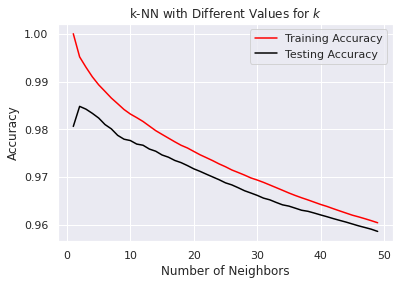

In [ ]:
neighbors = np.arange(1, 50)
plot_complexity_curve(neighbors, KNeighborsRegressor, X_train, X_test, y_train, y_test)

## Model conclusion

Since choosing more neighbors consumes more time to compute, we chose a certain amount of neighbors to plot in order to get best neighbor in most effective time consuming way.

Therefore i chose to plot max 50 neighbors and saw that the best neighbor values are around 10 to 20. 

In the Regression it shows that the best values are between 2 and 4?

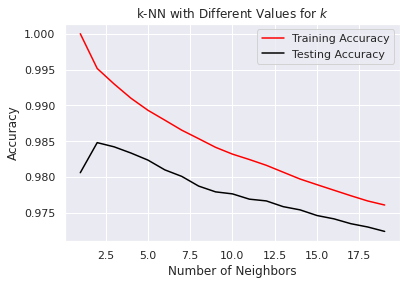

In [ ]:
neighbors = np.arange(1, 20)
plot_complexity_curve(neighbors, KNeighborsRegressor, X_train, X_test, y_train, y_test)

In [ ]:
knn_test = KNeighborsRegressor(n_neighbors=10)
knn_test.fit(X_test, y_test)
knn_test.score(X_test, y_test)

The next step was to plot the values from 1 to 20 because the most suitable neighbor values are shown here. 

The Goal is to minimize the range of the best value.

The neighbor values from 10 to 15 are looking like the best ones for this model. 

# Model: Extra trees
Samuel Trescoli



## Documentation

https://quantdare.com/what-is-the-difference-between-extra-trees-and-random-forest/#:~:text=Random%20forest%20uses%20bootstrap%20replicas,uses%20the%20entire%20input%20sample.



https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

The extra trees algorithm works in a similar way as Random forest.
Before using this algorithim I was exploring other solutions such as the elastic net, but as we can see in the previous model, PolyniomialRegression, linear models will not work properly if we use all the data.
However, it would work properly if we use the Wind speed as unique input.


## Differences between Random forest and Extra Trees

The main two differences are the following:


-Random forest uses bootstrap replicas, that is to say, it subsamples the input data with replacement, whereas Extra Trees use the whole original sample. In the Extra Trees sklearn implementation there is an optional parameter that allows users to bootstrap replicas, but by default, it uses the entire input sample. This may increase variance because bootstrapping makes it more diversified.


-Another difference is the selection of cut points in order to split nodes. Random Forest chooses the optimum split while Extra Trees chooses it randomly. However, once the split points are selected, the two algorithms choose the best one between all the subset of features. Therefore, Extra Trees adds randomization but still has optimization.



These differences motivate the reduction of both bias and variance. On one hand, using the whole original sample instead of a bootstrap replica will reduce bias. On the other hand, choosing randomly the split point of each node will reduce variance.



In terms of computational cost, and therefore execution time, the Extra Trees algorithm is faster. This algorithm saves time because the whole procedure is the same, but it randomly chooses the split point and does not calculate the optimal one.

## Implementing the model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor


The coefficient of determination  is defined as, where  is the residual sum of squares ((y_true - y_pred)** 2).sum() and  is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 

In [ ]:

X_k=turbine_data.iloc[:,1:29]
                
y_k=turbine_data['Prod_LatestAvg_ActPwrGen1']
X_k.shape

(34891, 28)

As we can see I removed the columns that coantain time spans, I consider them not very importatant.

In [ ]:
Xt_train, Xt_test, yt_train, yt_test = train_test_split(X_k, y_k, test_size=0.2, random_state=1999)
reg = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(Xt_train, yt_train)
reg.score(Xt_test, yt_test)

0.9999894062266607

In [ ]:
reg1 = ExtraTreesRegressor(n_estimators=10, random_state=0).fit(Xt_train, yt_train)
reg1.score(Xt_test, yt_test)

0.999985034191659

In [ ]:
for i in range(1,10):
  reg_test=ExtraTreesRegressor(n_estimators=i, random_state=0).fit(Xt_train, yt_train)
  print(i)
  print(reg_test.score(Xt_test, yt_test))
  

1
0.9997305879517936
2
0.9999216276535612
3
0.9999650942064257
4
0.9999763895143599
5
0.9999830814841189
6
0.9999865002733476
7
0.9999840192495654
8
0.9999857441826667
9
0.9999832145664388


In [ ]:
reg.score(Xt_train, yt_train)

1.0

## Evaluation

We can see that the RSM is almost 1, so the model fits the data properly

In [ ]:
predictiont = reg.predict(Xt_test)
yt_pred=pd.DataFrame(predictiont, columns=['Prod_LatestAvg_ActPwrGen1'])

In [ ]:
yt_test = yt_test.reset_index()
yt_test.drop(['index'], axis=1, inplace=True)

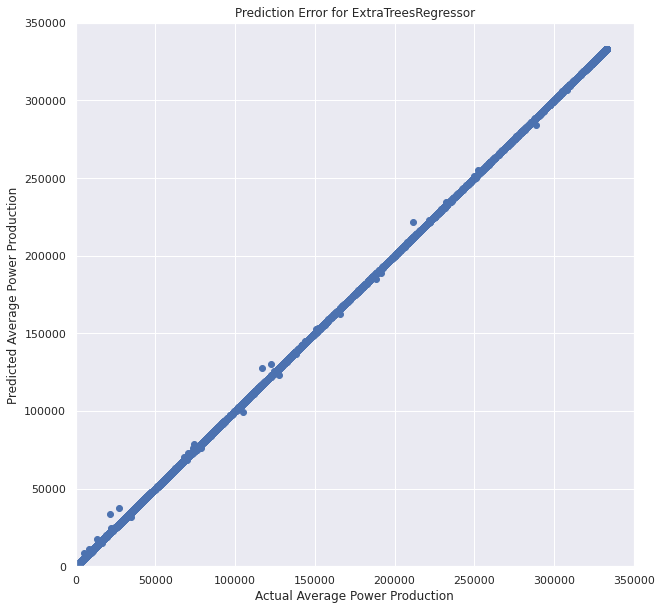

In [ ]:
plt.figure(figsize=(10, 10))
plt.scatter(yt_test,yt_pred)
plt.xlabel("Actual Average Power Production")
plt.ylabel("Predicted Average Power Production")
plt.xlim([0,350000])
plt.ylim([0,350000])
plt.title(f"Prediction Error for {reg.__class__.__name__}")
plt.show()

Here is obvious that the model is having a really good performance, far better than random forest with the first model.

As the model is performing good I decide to not do futher analysis or changing the hyperparameters.

In [ ]:
reg.n_features_in_

28

In [ ]:
reg.feature_importances_


array([9.63874232e-05, 6.44913650e-03, 1.36900362e-06, 8.64596127e-02,
       1.78518215e-01, 6.90805226e-06, 5.86730180e-07, 9.02896778e-07,
       5.16633174e-01, 1.23718763e-02, 1.62859724e-03, 9.87268240e-05,
       1.42331361e-02, 5.10071184e-08, 1.55406814e-06, 7.34105065e-07,
       1.76379284e-04, 3.79175231e-04, 1.16488997e-01, 1.14538326e-03,
       6.74120034e-03, 1.57551667e-05, 2.83432795e-03, 2.27963098e-02,
       2.55177891e-03, 2.89030015e-02, 1.46554242e-03, 1.18175759e-06])

In [ ]:
reg.feature_names_in_

array(['Gen_RPM_Std', 'Hyd_Oil_Temp_Avg', 'Gear_Oil_Temp_Avg',
       'Rtr_RPM_Avg', 'Amb_WindSpeed_Avg', 'Amb_WindSpeed_Std',
       'Amb_WindDir_Relative_Avg', 'Amb_WindDir_Abs_Avg',
       'Prod_LatestAvg_ActPwrGen1', 'Prod_LatestAvg_TotReactPwr',
       'Blds_PitchAngle_Avg', 'Blds_PitchAngle_Std',
       'Grd_Prod_CosPhi_Avg', 'Grd_Prod_Freq_Avg',
       'Grd_Prod_VoltPhse1_Avg', 'Grd_Prod_VoltPhse2_Avg',
       'Grd_Prod_VoltPhse3_Avg', 'Rtr_RPM_Std', 'Amb_WindSpeed_Est_Avg',
       'Grd_Prod_Pwr_Std', 'Grd_Prod_ReactPwr_Avg',
       'Grd_Prod_ReactPwr_Std', 'Grd_Prod_PsblePwr_Std',
       'Grd_Prod_PsbleInd_Avg', 'Grd_Prod_PsbleInd_Std',
       'Grd_Prod_PsbleCap_Avg', 'Grd_Prod_PsbleCap_Std',
       'Nac_Direction_Avg'], dtype=object)

There is also the possibility to reduce the number of inputs due to the accuaracy of the model, but as we see the algorithim is very fast so there is no real need to remove parameters.

We only should remove the ones that are between e-09 and e-06, but there are only 8 parameters.

# Overall Conclusion


Eventhough the extra trees has the highest performance in R^2 terms. We chose that the Random Forrest achieves the business objective, which is what features are the most important to predict the power production, the best. 

What was surprising is that only the windspeed has a significant influence for the model. WE think that this might be because of the large dataset. 

Also surprising was that all of our model had a very high performance already at the beginning, which left us not much room for further improvements of the model.

Even tough the Nearest Neighbor showed a really good performance, we wouldnt recomend this model due to this datset beeing very big and the knn-model works relatively slow therefore. 
